# Preliminary Data Preprocessing

In [17]:
#Import Required Packages for data analysis and manipulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from heatmap import heatmap, corrplot
from sklearn.feature_selection import *

# Import Models 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

# Import Model Selection Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# import metrics and other useful tools
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Import packages for over-sampling
from collections import Counter
from imblearn.over_sampling import SMOTENC


In [3]:
# Import dataset from csv
data = pd.read_csv("telcoCustomerChurn.csv")

# Print first 10 rows to have an elementary view of the data
data.head(5)
#data.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the data above we can see while the dataset looks functional, there appear to be some basic errors with the input of the data and column names. Specifically
* All column names are capitalized, except for tenure, and totalcharges, as well as a few others
* totalCharges is a python object variable, rather than a floating 64 point number as it should represent a total dollar figure.
* SeniorCitizen is capitalized, and is characterized as numeric data, when it is more likely to be boolean or factor based data.
Hence, we reread the data, renaming and assigning new data types as required using a python dictionary and the secondary arguments of the read_csv function

In [4]:
# Define the dictionary pairings
nameDict= {'customerID':'object','gender':'object','seniorCitizen':'object','partner':'object','dependents': 'object' ,'tenure':np.int64,'phoneService':'object','multipleLines':'object','internetService':'object','onlineSecurity':'object','onlineBackup':'object','deviceProtection':'object','techSupport':'object','streamingTV':'object','streamingMovies':'object','contract':'object','paperlessBilling':'object','paymentMethod':'object','monthlyCharges':np.float64,'totalCharges':np.float64,'churn':'object'}

# Reread the csv wth added changes.
df = pd.read_csv("telcoCustomerChurn.csv", header = 0, names = ['customerID','gender','seniorCitizen','partner','dependents','tenure','phoneService','multipleLines','internetService','onlineSecurity','onlineBackup','deviceProtection','techSupport','streamingTV','streamingMovies','contract','paperlessBilling','paymentMethod','monthlyCharges','totalCharges','churn'], na_values = " ",dtype=nameDict)

#  Examine the first five rows
df.head(5)

,customerID,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,...,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Examine the data types of the changed csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorCitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneService      7043 non-null   object 
 7   multipleLines     7043 non-null   object 
 8   internetService   7043 non-null   object 
 9   onlineSecurity    7043 non-null   object 
 10  onlineBackup      7043 non-null   object 
 11  deviceProtection  7043 non-null   object 
 12  techSupport       7043 non-null   object 
 13  streamingTV       7043 non-null   object 
 14  streamingMovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessBilling  7043 non-null   object 


Now that basic data types are fixed, we want to go the usual route and check for any missing data, duplicates or strange results.

In [6]:
# Check for Null Values
df.isnull().values.any()
print(df.isnull().sum())

customerID           0
gender               0
seniorCitizen        0
partner              0
dependents           0
tenure               0
phoneService         0
multipleLines        0
internetService      0
onlineSecurity       0
onlineBackup         0
deviceProtection     0
techSupport          0
streamingTV          0
streamingMovies      0
contract             0
paperlessBilling     0
paymentMethod        0
monthlyCharges       0
totalCharges        11
churn                0
dtype: int64


Evidently there are missing values in the totalCharges column, which do not appear to be clear as to why they are missing values. Lookning back at the original CSV, for the 11 missing values those contracts have 0 in their tenure, most likely having cancelled their contract before the month was up. This obviously meant that they weren't charged anyting in total, so this missing values should really just be zeros.

In [7]:
# Replace the missing values in totalCharges for the rows in the dataframe which have 0 in tenure
df[df['tenure']==0]=df[df['tenure']==0].replace(np.nan,0)

# Now after running this command let us check for missing values:
print(df.isnull().sum())

customerID          0
gender              0
seniorCitizen       0
partner             0
dependents          0
tenure              0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
contract            0
paperlessBilling    0
paymentMethod       0
monthlyCharges      0
totalCharges        0
churn               0
dtype: int64


In [8]:
# Next, we check for any duplicated values, fortunately there is none, so we can move on.

# Check for duplicated values
df.duplicated().values.sum()

0

In [9]:
# Drop customerID from the dataframe as while it provides useful individual information
# it is not helpful in aggregate, due to the large variety of unique values.
# Moreoever, we also drop totalCharges to avoid the issue of collinearity with monthly charges present.
df = df.drop(['customerID','totalCharges'], axis=1)

# Exploratory Data Analysis

In [11]:
# Let us examine the numerical variables statistical summary to see if we can find anything out of the ordinary.
df.describe(include = ['float64','int64'])

,tenure,monthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [12]:
# calculate coefficients of variations

df.select_dtypes(include=['float64','int64'])
cv =  lambda x: np.std(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=df.select_dtypes(include=['float64','int64']))
print(var)

[0.7586304  0.46459426]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


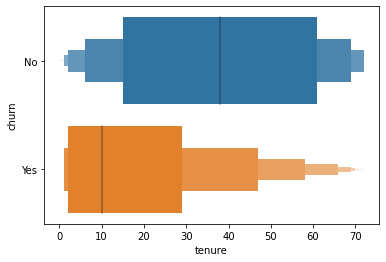

In [13]:
#Plot a boxenplot to examine the shape of the data 
ax = sns.boxenplot(x="tenure", y="churn", data=df)

Analysis:
* Those who did participate in churn are significantly left skewed towards lower tenure, then as opposed to those who didn't, along with a significantly lower mean of 10 years as opposed to a higher mean close to 36/37 years for those who didn't churn.
* As the data is too dense in terms of individual dot poitns to overlay, and is imbalanced, we can't draw any quick conclusions from this graph, only to suggest that there may be a link between lower tenure and the likelihood of lapse for a given customer.

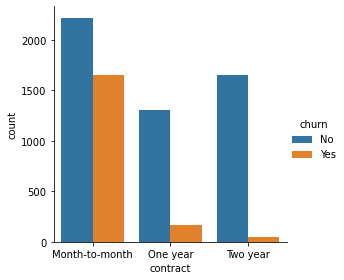

In [14]:
# Plot a histogram of the data to examine the distribution of the data
sns.catplot(x="contract", hue="churn",data=df, kind="count",height=4, aspect=1);

Analysis: 
* A significantly higher porportion of individuals left their contracts under month-to-month contracts rather than for longer contracts, although the imbalanced nature of the data makes it difficult to adequately tell. This suggests it might be fruitful to explore the relation of the length of contracts in relation to the likelihood of churn.

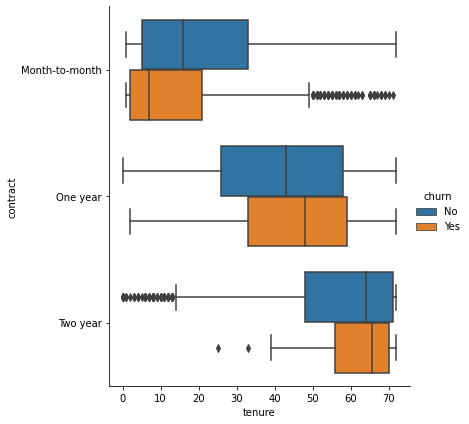

In [15]:
# For the following graphs, plot a boxplot to examine their relationship as categorical variables.
sns.catplot(x="tenure", y="contract",

                hue="churn",

                data=df, kind="box",

                height=6, aspect=1);

Observations:
* Month-month has a significant number of observations, as well as a high percentage of outliers, which means that during analysis it should ideally be scaled in terms of it's variance to enable easy comparison with other variables and their effect on churn.
* Generally, those with month-month contracts hold similiar tenure for whether or not they leave or stay, but for those who do leave they are more tightly bunched around the 0-20 range
* For one-year contracts and even two-year contracts both leavers and non-leavers tend to occupy similiar ranges, but churn in all chases seems to display lower variability than their non-churning counterparts, which makes it slightly easier to manage their behavior.
* Two year contracts tend to also have a significant number of outliers, and seem to be on opposing sides to month-month contracts, which are in line with their overall longer tenures. Those that do churn even with two year contracts tend to have very long tenures that lie around the 55-70 range.

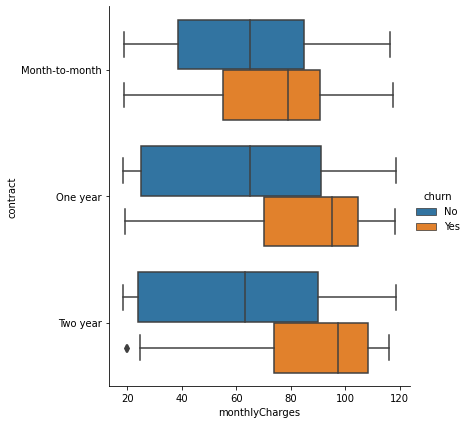

In [16]:
## For the following graphs, plot a boxplot to examine their relationship as categorical variables.
sns.catplot(x="monthlyCharges", y="contract",

                hue="churn",

                data=df, kind="box",

                height=6, aspect=1);

Observations:
* For all contracts, those who are likely to churn tend to have higher monthly charges, as opposed to those who do not.
* Additionally, they all seem to have higher means than those who do not churn, but for those who are not ikely to churn, all of them have the same range and similiar means, which suggests that for people not likely to churn, they are relatively robust to the price.

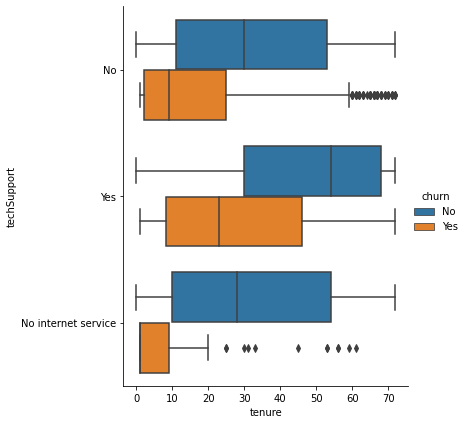

In [17]:
## For the following graphs, plot a boxplot to examine their relationship as categorical variables.
sns.catplot(x="tenure", y="techSupport",

                hue="churn",

                data=df, kind="box",

                height=6, aspect=1);

Observations:
* For those that do not have tech support, churn seems to have a significant number of outliers, and high variability but in general have lower tenures than their non churning counterparts
* For those that do have tech suport, tenures tend to be higher but are on avrage lower than their non churning counterparts, although in contract to the other two options display higher variability
* For those without internent service, there seems to be a significant number of outliers and a significantly low average of 0 tenure, whic may be due to our edits above introducing new zeros into the dataset, or a consequence of the imbalanced nature of the dataset. While one can conclude no internet service is a useful predictor, I believe that there is not enough information here to reasonably conclude that it will indeed be useful.

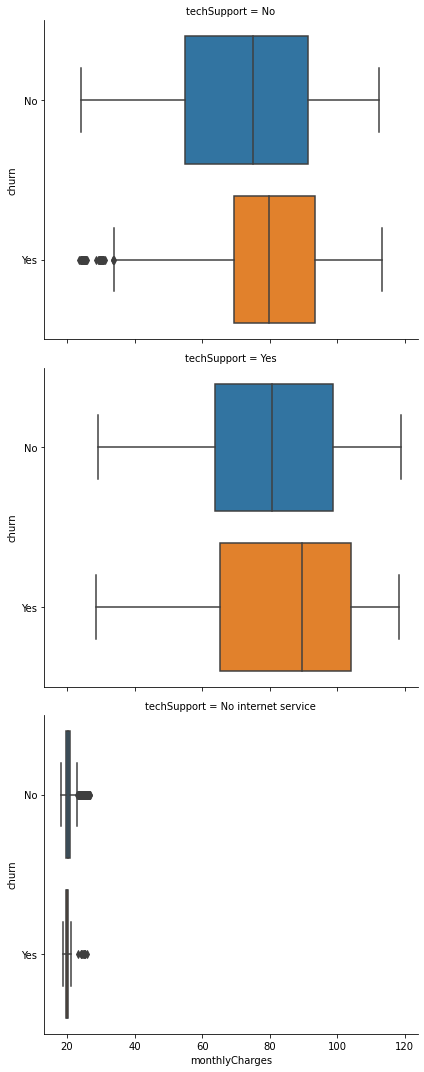

In [20]:
# For the following graphs, plot a boxplot to examine their relationship as categorical variables.
sns.catplot(x="monthlyCharges", y="churn",
            row="techSupport", aspect=1.2,
            kind="box", data=df);


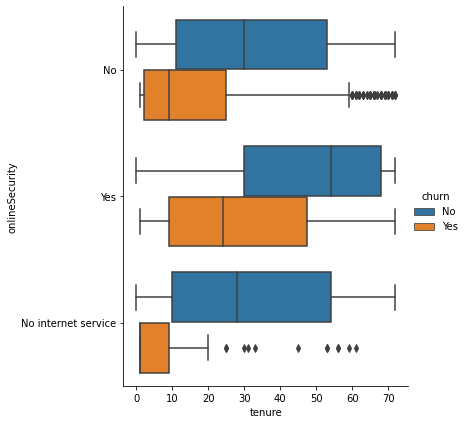

In [21]:
# For the following graphs, plot a boxplot to examine their relationship as categorical variables.
sns.catplot(x="tenure", y="onlineSecurity",

                hue="churn",

                data=df, kind="box",

                height=6, aspect=1);

Observations
* The graphs on display here seem to tell us mostly the same information so I'll omit analysis for further graphs.

# Model Preprocessing

As the majority of features used in the dataset are primarily categorical features, converting them to dummy variables via oneHotEncoding and OrdinalEncoder methods from scikitlearn will enable us to utilize classification machine learning methods on the data.

In [10]:
# Get Dummies
dfdum=pd.get_dummies(df,prefix_sep='_')

In [25]:
# Calculate correlations for the dataset and plot their correlation matrix.
corr = dfdum.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Analysing the correlation plot, we see most features are fairly weakly correlated, so we want to explore features that do have a high
correlation with churning
From the graph, these appear to be, tenure (which is negative correlated, month to month contracts, presence of tech support, online security, fiber optic service, and electronic check payment methods
fiber optic is also strongly corelated with monthyl charges, especially so if no internet service was present. 

In [44]:
# Obtain the absolute values of the correlation
c = dfdum.corr().abs()

# Remove the structure of the dataframe they are associated in.
s = c.unstack()

# Sort the vector of values.
so = s.sort_values(kind="quicksort")

# Extract those with correlations greater than 0.5
so[so >0.5]

onlineSecurity_No internet service    techSupport_No                         0.518733
techSupport_No                        streamingTV_No internet service        0.518733
streamingMovies_No internet service   techSupport_No                         0.518733
internetService_No                    techSupport_No                         0.518733
techSupport_No internet service       techSupport_No                         0.518733
                                                                               ...   
                                      streamingTV_No internet service        1.000000
                                      streamingMovies_No internet service    1.000000
techSupport_Yes                       techSupport_Yes                        1.000000
deviceProtection_No internet service  streamingMovies_No internet service    1.000000
churn_Yes                             churn_Yes                              1.000000
Length: 183, dtype: float64

# Feature Selection

In [22]:
# Consider the original number of features in the dataset
df.shape

(7043, 19)

In [11]:
#Split the dataset into features and target variable, namely X and y.
X = dfdum.iloc[:, 0:45]
y = dfdum.iloc[:,46:47]


In [25]:
# Select the best features based on the top 10% performing ones based on the criteria of mutual information
selector = SelectPercentile(mutual_info_classif, percentile=10)
selector.fit(X, y.values.ravel())

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new.columns


Index(['tenure', 'onlineSecurity_No', 'techSupport_No',
       'contract_Month-to-month', 'contract_Two year'],
      dtype='object')

Under chi2 tests, the 10 best features are 'tenure', 'monthlyCharges', 'internetService_Fiber optic',
       'onlineSecurity_No', 'techSupport_No',
       'streamingTV_No internet service',
       'streamingMovies_No internet service', 'contract_Month-to-month',
       'contract_Two year', 'paymentMethod_Electronic check'
       
       
How about under F, tests?
'tenure', 'internetService_Fiber optic', 'onlineSecurity_No',
       'onlineBackup_No', 'deviceProtection_No', 'techSupport_No',
       'streamingMovies_No internet service', 'contract_Month-to-month',
       'contract_Two year', 'paymentMethod_Electronic check']
       
       
Roughly the same, so what happens when we consider mutual info classification which looks at non-linear dependencies?
['tenure', 'monthlyCharges', 'internetService_Fiber optic',
       'onlineSecurity_No', 'onlineBackup_No', 'techSupport_No',
       'streamingTV_No internet service', 'contract_Month-to-month',
       'contract_Two year', 'paymentMethod_Electronic check']
       
       
Top 10% of Features:
['tenure', 'internetService_Fiber optic', 'onlineSecurity_No',
       'techSupport_No', 'contract_Month-to-month'],
      dtype='object')
      
      
Top 10% Non-linear features tenure', 'onlineSecurity_No', 'techSupport_No',
       'contract_Month-to-month', 'paymentMethod_Electronic check'

In [15]:
# Recursive Feature Elimination:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y.values.ravel())

# Print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 42


In [17]:
cols = rfecv.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new.columns

Index(['tenure', 'gender_Male', 'seniorCitizen_0', 'seniorCitizen_1',
       'partner_No', 'partner_Yes', 'dependents_No', 'dependents_Yes',
       'phoneService_No', 'phoneService_Yes', 'multipleLines_No',
       'multipleLines_No phone service', 'multipleLines_Yes',
       'internetService_DSL', 'internetService_Fiber optic',
       'internetService_No', 'onlineSecurity_No',
       'onlineSecurity_No internet service', 'onlineSecurity_Yes',
       'onlineBackup_No', 'onlineBackup_No internet service',
       'onlineBackup_Yes', 'deviceProtection_No',
       'deviceProtection_No internet service', 'deviceProtection_Yes',
       'techSupport_No', 'techSupport_No internet service', 'techSupport_Yes',
       'streamingTV_No', 'streamingTV_No internet service', 'streamingTV_Yes',
       'streamingMovies_No', 'streamingMovies_No internet service',
       'streamingMovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'paperlessBilling_No', 'paperlessBilling_Yes',
       'paym

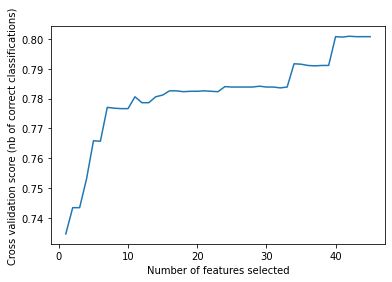

In [16]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [18]:
#L1 Based Feature Selection (Regularization)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter = 5000).fit(X, y.values.ravel())
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
cols = model.get_support(indices=True)
X_svc = X.iloc[:,cols]
X_svc.columns


Index(['tenure', 'monthlyCharges', 'seniorCitizen_0', 'dependents_Yes',
       'phoneService_Yes', 'multipleLines_No', 'internetService_DSL',
       'onlineSecurity_No', 'onlineSecurity_Yes', 'onlineBackup_Yes',
       'deviceProtection_No internet service', 'techSupport_No',
       'techSupport_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paperlessBilling_No',
       'paymentMethod_Electronic check', 'paymentMethod_Mailed check'],
      dtype='object')

In [19]:
# Tree Based Feature Selection
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y.values.ravel())
clf.feature_importances_
modeltree = SelectFromModel(clf, prefit=True)
X_tree = modeltree.transform(X)
cols = modeltree.get_support(indices=True)
X_svc = X.iloc[:,cols]
X_svc.columns


Index(['tenure', 'monthlyCharges', 'gender_Male',
       'internetService_Fiber optic', 'onlineSecurity_No', 'techSupport_No',
       'contract_Month-to-month', 'paymentMethod_Electronic check'],
      dtype='object')

Ultimately what this analysis suggests that there are a variety of combinations of variables that can be useful as predictors, but those that ultimately stand out are:
tenure
internetService_Fiber optic
onlineSecurity_No
techSupport_No
contract_Month-to-month

Which suggests that most likely the primary reasons for an indivdual to lapse from a contract may be related to the length of their contract, whether they have fast internet in the form of fiber optic, access to online security and tech support and whether or not their contract is month-to-month.


# Removing Collinearity

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a function to calculate the respective VIF for each variable in the daaset
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif) 

In [ ]:
# Calculate the VIF for the dataset
calc_vif(df)

# Experimenting with Classification Algorithims

In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# Build a pipeline of the classifier we're going to use to get an elementary look at their performance.
classifiers = [
    LogisticRegression(solver = 'saga', random_state=42, max_iter = 10000),
    GaussianNB(),
    tree.DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=2, random_state=42),
    BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=42),
    AdaBoostClassifier(n_estimators=200),
    GradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(random_state=42,learning_rate=0.01)
    ]

# For each classifier in classifiers, scale the inputs and then apply the algorithim.
# Then, fit the algorithim and print it's score.
for classifier in classifiers:
    pipe = Pipeline(steps=[('scale',StandardScaler()),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train.values.ravel())   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    

LogisticRegression(max_iter=10000, random_state=42, solver='saga')
model score: 0.811
GaussianNB()
model score: 0.696
DecisionTreeClassifier()
model score: 0.723
RandomForestClassifier(max_depth=2, random_state=42)
model score: 0.745
BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=42)
model score: 0.798
AdaBoostClassifier(n_estimators=200)
model score: 0.802
GradientBoostingClassifier(random_state=42)
model score: 0.809
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_paramete

Examining the output above, Logistic Regression, Gradient Bossted Trees and the AdaBoost Classifier seem to be our best bets for a good classification algorithim, as Gaussian and LDA/QDA do not work well due to the implicit correlation present in our dummy variables that cannot be easily removed.

# Examining the Classifiers in Depth

## Definitions of some metrics
* Accuracy: Accuracy in this case refers to the portion of cases that your algorithim has predicted correctly. We don't actively use this statistic in this run due to it's ability to be meaningless for imbalanced datasets, as the fraction of correct observations doesn't take into account the skewed nature of the data. However, in those cases, python does have an adjusted accuracy metric to account for the imbalanced nature of the data. However, in this case as I believe the cost of misdiagnosis is more severe for the company, we focus on recall as the key scoring metric.
* Confusion Matrix: A matrix which outlines in a table the number of true positives, false positive, true negatives and false negatives predicted by the classification algorithim.
* Precision: The fraction of observations that are predicted correctly out of the total.
* Recall: The probability that your classification predicted correctly out of all positive samples.
* F_1 Score: Weighed Harmonic Mean of the above two measures
* ROC: Receiver Operating Characteristic, essentially a measure of the performance of your classifer that compares your true positive rate to your false positive rate over a series of thresholds.

Accuracy of logistic regression classifier on test set: 0.81
[[1390  149]
 [ 250  324]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113



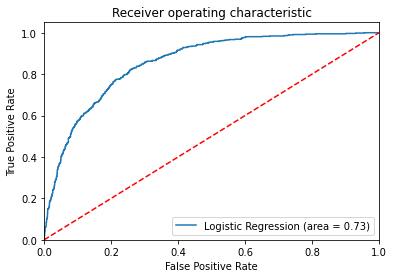

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initalize and fit the model.
logr = LogisticRegression(solver = 'saga', random_state=0, max_iter = 2000)
logr.fit(X_train, y_train.values.ravel())

# Make Predictions
y_pred=logr.predict(X_test)

# Print the accuracy of the classifier.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logr.score(X_test, y_test)))

# Examine metrics on the recall and precision of our predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Compute the ture positive and false positive rates and then plot them against one another to obtain the graph for roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Compute the Area Under the ROC curve (AUC)
logr_roc_auc = roc_auc_score(y_test, logr.predict(X_test))

# Calculating the false positive rate, true positive rates and roc_curves.
fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:,1])

# Plot the result of our calculations.
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Analysis:
*  From prliminary analysis of the model we see that it displays fairly good accuracy on the test set, which implies we might want to use this or  amixutre f this model for future refinement.
* The weighed recall of the overall classifier is 90% for class 0 which implies that 90% of the true positives it diagnoses out of the total (true positive + false negatives) are actually true positives, whereas it is only 56% for class 1. This implies that whilst predictability for all relevant cases is good for class 0, it is less so for class 1, which implies there might be a case of imbalanced data present within the dataset.
* The classifer can predict the correct case 81% of the time, but considering the skewe metrics for precision and recall this may perhaps just mean 81% accuracy for the majority class which is class 0.
* In terms of precision, or how many of the relevant cases are actually diagnosed, the same behavior repeats for class 0 and class 1, where out of the total churn cases identified, only 80% of them are correctly identified.
* The area under the curve, or the total performance of the clasifier suggests a performance of 0.73, which we shall set as our inital benchmark for now.

In [18]:
# Linear Discriminant Analysis, LDA same performance as logistic, QDA worse performance because of collinearity
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initalize LDA and QDA models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Fit LDA and QDA Models
lda.fit(X_train,y_train.values.ravel())
qda.fit(X_train, y_train.values.ravel())

# Make predictions on the above models
y_predlda=lda.predict(X_test)
y_predqda=qda.predict(X_test)

# Print the accuracy of our models.
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))
print('Accuracy of QDA classifier on test set: {:.2f}'.format(qda.score(X_test, y_test)))

# Print the classification report.
print(classification_report(y_test, y_predlda))
print(classification_report(y_test, y_predqda))

Accuracy of LDA classifier on test set: 0.81
Accuracy of QDA classifier on test set: 0.56
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1539
           1       0.67      0.58      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

              precision    recall  f1-score   support

           0       0.97      0.41      0.58      1539
           1       0.38      0.96      0.54       574

    accuracy                           0.56      2113
   macro avg       0.67      0.69      0.56      2113
weighted avg       0.81      0.56      0.57      2113



C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
Analysis:
* LDA displays similiar performance to Logistic Regession, most likely due to both using linear decision boundaries
* QDA displays significantly worse performance due to the presence of collinearity due to the creation of dummy variables, especaill with regards the skew towards predictions for class 0.

In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_predgnb=gnb.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))
print(classification_report(y_test, y_predgnb))


Accuracy of Naive Bayes classifier on test set: 0.70
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1539
           1       0.47      0.87      0.61       574

    accuracy                           0.70      2113
   macro avg       0.70      0.75      0.68      2113
weighted avg       0.80      0.70      0.71      2113



In [20]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Make a pipelien and scale the input.
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train, y_train.values.ravel())

# Calculate probabilities, accuracy, recall rates.
y_predsgd=sgd.predict(X_test)
print('Accuracy of SGD classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
print(classification_report(y_test, y_predsgd))


Accuracy of SGD classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1539
           1       0.62      0.63      0.62       574

    accuracy                           0.79      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



In [87]:
# Decision Tree Classifier
from sklearn import tree
dtreec = tree.DecisionTreeClassifier()
dtreec.fit(X_train, y_train.values.ravel())

# Calculate probabilities, accuracy, recall rates.
y_predtree=dtreec.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtreec.score(X_test, y_test)))
print(classification_report(y_test, y_predtree))

Accuracy of Decision Tree Classifier on test set: 0.73
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.51      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [88]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train.values.ravel())
# Calculate probabilities, accuracy, recall rates.
y_predrf=rf.predict(X_test)
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
print(classification_report(y_test, y_predrf))

Accuracy of RandomForest classifier on test set: 0.75
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1539
           1       0.86      0.07      0.14       574

    accuracy                           0.75      2113
   macro avg       0.80      0.54      0.49      2113
weighted avg       0.77      0.75      0.66      2113



In [89]:
# AdaBoost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Define and fit the algorithim.
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train.values.ravel())

# Calculate probabilities, accuracy, recall rates.
y_predada=ada.predict(X_test)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(ada.score(X_test, y_test)))
print(classification_report(y_test, y_predada))

# As the results from AdaBoost can be finnicky, use 5-fold cross validation to ensure usefulness of results.
scores = cross_val_score(ada, X_test, y_test.values.ravel(), cv=5)
scores.mean()

Accuracy of AdaBoost classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.66      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



0.7960169406070384

Analysis:
* AdaBoost has similiar performance in competing with logistic regression, but tends to perform poorly on the recall of the estimator, which measures it's ability to find all relevant observations.
* Hence, optimizing for a weighed f1 measure more tied towards a good mix of precision and recall may be useful in tuning the final model.

In [28]:
# Baggingfrom sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bagc = BaggingClassifier(base_estimator=LogisticRegression(solver = 'sag',max_iter=10000, tol=0.1), random_state=42)
bagc.fit(X_train,y_train.values.ravel())

# Calculate probabilities, accuracy, recall rates.
y_predbag=bagc.predict(X_test)
print('Accuracy of Bagging classifier on test set: {:.2f}'.format(bagc.score(X_test, y_test)))
print(classification_report(y_test, y_predbag))

Accuracy of Bagging classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.70      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Analysis:
Adaboost and Bagging along with gradient boosted decision trees are almost neck and neck in term sof the classifier's ability to classify all observations correctly and find all relevant observations, with marginal difference in classifier performance, although this bagging classifier uses bagged logistic regression, whereas adaboost utilises decision trees, which are more prone to overfitting.


In [35]:
# Gradient Boostd Decision Trees (Maybe have a look at SVC later.)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.04,n_estimators = 550,max_features='sqrt',subsample=0.8,random_state=42)
gbc.fit(X_train,y_train.values.ravel())

# Calculate probabilities, accuracy, recall rates.
y_predgb=gbc.predict(X_test)
print('Accuracy of Gradient Boosted classifier on test set: {:.2f}'.format(gbc.score(X_test, y_test)))
print(classification_report(y_test, y_predgb))

Accuracy of Gradient Boosted classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [29]:
# XG Boost
# Train Test Split
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state=42,learning_rate=0.01)
xgb.fit(X_train, y_train.values.ravel())
xgb.score(X_test,y_test)

# Calculate probabilities, accuracy, recall rates.
y_predxg=xgb.predict(X_test)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
print(classification_report(y_test, y_predxg))

Accuracy of XGBoost classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1539
           1       0.66      0.55      0.60       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Analysis:
* Much like the other previous ensemble based learning methods XG boost seems to perform very well in terms of classification,and presents less of a gap between prediction rates for both classes.
    

# Unbalanced Classes
One major issue often found in many classification problems is the problem of unbalanced classes. This refers to the fact that for classification problems, the majority class generally has more samples or exists in greater proportions than the minority class, which skews the classification algorithim's predictive capacity. 

In layman's terms if there are 900 nos and 100 yes in a classification dataset, the overwhelming majority of the no's are going to make the model very good at predicting a no case, but not so good when predicting a yes case.

We can counter these effects by considering resampling strategies, and in particular I will be considering an adjustment to the SMOTE class of resampling strategies which incorporates categorical data. 

In [21]:
# Check class totals to examine evidence for imbalanced classes
pd.crosstab(df.churn,df.churn, normalize = True)

churn,No,Yes
churn,,
No,0.73463,0.00000
Yes,0.00000,0.26537


As we can see from above, there is a definite imbalance in the number of customers who did not churn, which means that classification algorithims are likely to be significantly more biased towards predicting no, as to predicting yes

To simplify the rerunning of previous algorithims under a SMOTE-resampling outlook, we shall take advantage of python's pipeline feature, to also perform feature selection to improve accuracy.

In [23]:
# Import additional required packages
from collections import Counter
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

# Implement the required elements
pca = PCA()
smt = SMOTENC(categorical_features=range(2,45), random_state=42)
classifiers = [
    LogisticRegression(solver = 'saga', random_state=42, max_iter = 10000),
    GaussianNB(),
    tree.DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=2, random_state=42),
    BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=42),
    AdaBoostClassifier(n_estimators=200),
    GradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(random_state=42,learning_rate=0.01)
    ]

# For each classifier, scale the model, resample it and then fit and apply the classifer.
# After fitting print the accuracy of the chosen classifier.
for classifier in classifiers:
    pipe = Pipeline(steps=[('scale',StandardScaler()),('smt', smt),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train.values.ravel())
    y_pred=pipe.predict(X_test)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print(classification_report(y_test, y_pred))

C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


LogisticRegression(max_iter=10000, random_state=42, solver='saga')
model score: 0.769
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1539
           1       0.55      0.78      0.65       574

    accuracy                           0.77      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.77      0.78      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


GaussianNB()
model score: 0.712
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1539
           1       0.48      0.86      0.62       574

    accuracy                           0.71      2113
   macro avg       0.70      0.76      0.69      2113
weighted avg       0.81      0.71      0.73      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


DecisionTreeClassifier()
model score: 0.722
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1539
           1       0.49      0.57      0.53       574

    accuracy                           0.72      2113
   macro avg       0.66      0.67      0.67      2113
weighted avg       0.74      0.72      0.73      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


RandomForestClassifier(max_depth=2, random_state=42)
model score: 0.737
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1539
           1       0.51      0.82      0.63       574

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=42)
model score: 0.774
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1539
           1       0.57      0.71      0.63       574

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.77      0.78      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


AdaBoostClassifier(n_estimators=200)
model score: 0.765
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1539
           1       0.55      0.78      0.64       574

    accuracy                           0.76      2113
   macro avg       0.73      0.77      0.73      2113
weighted avg       0.81      0.76      0.78      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


GradientBoostingClassifier(random_state=42)
model score: 0.767
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1539
           1       0.55      0.77      0.64       574

    accuracy                           0.77      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.77      0.78      2113



C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.762
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1539
           1       0.55      0.75      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



Elementary Observations:
* Accuracy went down to 77% after resampling for logistic regression, precision is still high for majority class, but recall statistics are closer.
* Naive Bayes holds similiar statistics, with a accuracy of 71%
* Decision Tree had accuracy of 72%, random forests 74%
* Bagging: 74% accuracy, similiar stats to log
* Gradient Boosted 76% (second highest), tied with ada.
* Seems clear that a mixture of logr, gdb + ada would be useful, especially since the bagged classifier displayed the highest precision scores for class 1.

In [24]:
# We use SMOTENC here as it is SMOTE resampling that accounts for categorical features
# Create the rules for resampling
sm = SMOTENC(random_state=42, categorical_features=[18, 19]) 

# Resample our given dataset
X_res, y_res = sm.fit_resample(X, y)

# Create new train test ssplits based on this dataset.
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state=42)

C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\Users\arnav\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


# HyperParameter Tuning

In [67]:
# set the tolerance to a large value to enable it to each a solution faster.
logistic = LogisticRegression(penalty = 'l2', solver = 'sag',max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('fs', SelectKBest(f_classif)), ('logistic', logistic)])
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'fs__k': [5, 15, 30, 42,45],
    'logistic__C': np.logspace(-0.01, 0.01, 20),
}
# Create a new GridSearch object to perform extensive hyperparameter scanning for the above model
# using all cores of the cpu and focusing paritcularly on the AUC metric.
# cross validate your scores using 5-fold cross validation
search = GridSearchCV(pipe, param_grid, n_jobs=-1,scoring = scoring,refit='AUC', cv = 5)
search.fit(X_train_res, y_train_res.values.ravel())
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

#{'fs__k': 45, 'logistic__C': 0.989152283444125}
# bst is sad 0.875


Best parameter (CV score=0.875):
{'fs__k': 45, 'logistic__C': 1.0208157648868061}


In [29]:
# Calculate and print the classification report for this model.
y_pred_res=search.predict(X_test_res)
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1298
           1       0.80      0.83      0.82      1289

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



Analysis:
* After tuning the hyperparameters we can see that we have overall improved the score for the logistic regression classifier, resulting in a joint 80% performance for both precision and recall. This menas that the model is 80% likely to identify all relevant samples, and for 80% of samples to be correctly identified.
* The only problem is that it does not reduec the variables used, which makes it more difficult to use as a inferential model.

In [42]:
# Define a new Gradient Boosting Classifier and metrics to be used in hyperparameter testing.
gbc =GradientBoostingClassifier(n_estimators = 770, learning_rate=0.05,max_features=10,subsample=0.8,random_state=42, max_depth = 3, min_samples_split = 400)
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}

# Create a parameter grid for all the parameters you wish to tune, starting with learning rate then progressing 
# onto n_estimators, max depth and so on.
param_grid = {
   #'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1.0]
   #'n_estimators':range(20,1000,10)
   #'max_depth':range(1,25,2),
   #'min_samples_split':range(200,2000,200),
   # 'min_samples_leaf':range(1,25,1)
   # 'max_features':range(1,45,1)
   #'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]    
}

# Create a new GridSearch object to perform extensive hyperparameter scanning for the above model
# using all cores of the cpu and focusing paritcularly on the AUC metric.
# cross validate your scores using 5-fold cross validation
gs = GridSearchCV(gbc, param_grid, n_jobs=-1,scoring = scoring,refit='AUC', cv = 5)

# Fit the new GridSearch Object onto your resampled dataset.
gs.fit(X_train_res, y_train_res.values.ravel())

# Print the best scores and best parameters.
print("Best parameter (CV score=%0.3f):" % gs.best_score_)
gs.best_params_, gs.best_score_


Best parameter (CV score=0.938):


({}, 0.9382916825562319)

In [43]:
# Calculate and print the classification report for this model
y_pred_res2=gs.predict(X_test_res)
print(classification_report(y_test_res, y_pred_res2))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1298
           1       0.87      0.85      0.86      1289

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



A definite improvement in performance from the logistic model, but nothing too out of place to suggest overfitting.

From above we know that the best paramters for the Gradient Boosting Classifer are:
* Max Depth: 3
* Min_samples_split = 400
* n_estimators = 770
* min samples leaf = 2
* max_features = 10
* subsample = 0.8

In [61]:
# Create a new logistic regression with regularization to be used in the bagging classifier.
logis=LogisticRegression(penalty = 'l2', solver = 'sag',max_iter=10000, tol=0.1, C = 1.02)

# Create a new bagging classifier that assembles multiple logistic regressions.
baglog= BaggingClassifier(base_estimator=logis,n_estimators = 20, random_state=42)

# Define the parameter grid to be used in tuning this new model.
param_grid = {
   # 'base_estimator__C':np.logspace(-0.01, 0.01, 20)
    #'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1.0]
    #'n_estimators':range(20,100,10)
    #'max_samples':range(1,100,5),
    #'min_samples_split':range(200,2000,200),
    #'min_samples_leaf':range(1,25,1)
    #'max_features':range(1,45,1)
    #'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]    
}

# Define the new grid search object for tuning this paramter.
gs2 = GridSearchCV(baglog, param_grid, n_jobs=-1,scoring = scoring,refit='AUC', cv = 5)
gs2.fit(X_train_res, y_train_res.values.ravel())
print("Best parameter (CV score=%0.3f):" % gs2.best_score_)
gs2.best_params_, gs2.best_score_


Best parameter (CV score=0.875):


({}, 0.8728947299715507)

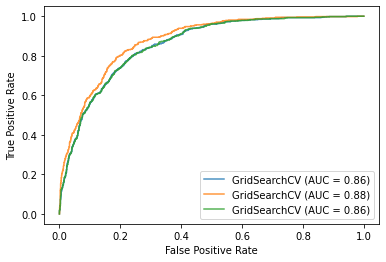

In [63]:
# Comparing Multiple Models: 
# Import the packages
from sklearn.metrics import plot_roc_curve

# Set the axes
ax = plt.gca()

# Plot the ROC curves of each GridSearch object on one graph for comparison.
logis_disp.plot(ax=ax, alpha=0.8)
gs_disp = plot_roc_curve(gs, X_test, y_test, ax=ax, alpha=0.8)
gs2_disp= plot_roc_curve(gs2, X_test, y_test, ax=ax, alpha=0.8)

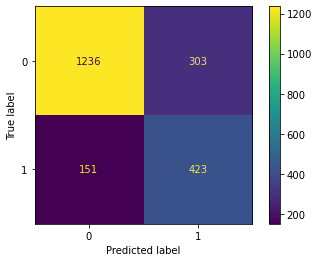

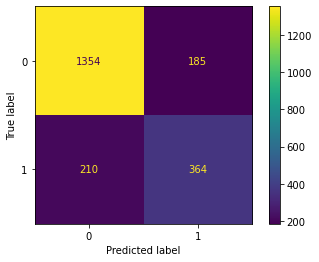

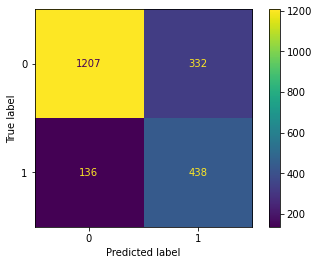

In [70]:
# Plot the confusion matrixes of the fitted models.
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(search, X_test, y_test)
plot_confusion_matrix(gs, X_test, y_test)
plot_confusion_matrix(gs2, X_test, y_test)

As we can see from the above results, it seems like the Bagged Classifier displays the best performance in terms of the greatest AUC and also in tmers of the largest number of properly classified observations, hence we shall be using this as our final inferential model.

# Final Model Pipeline

In [75]:
# Build the final model using the tuned parameters from before
bestgbc =GradientBoostingClassifier(n_estimators = 770, learning_rate=0.05,max_features=10,subsample=0.8,random_state=42, max_depth = 3, min_samples_split = 400)

# Put together the final pipeline with scaled inputs for the model, and make predictions.
finalpipe = Pipeline(steps=[('scale',StandardScaler()),('classifier', bestgbc)])
finalpipe.fit(X_train_res, y_train_res.values.ravel())
y_predfinal=finalpipe.predict(X_test_res)
y_predprobs=finalpipe.predict_proba(X_test_res)